In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE,ADASYN

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/attrition.csv')

In [ ]:
data.head(2)

,Age,Attrition,BusinessTravel,Department,EducationField,Environment Satisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8


In [ ]:
#data = data.drop(['Environment Satisfaction','JobInvolvement','WorkLifeBalance','JobSatisfaction','JobLevel'],axis = 1)

In [ ]:
#function to create dummy variables
def dummies(x):
    dummy = pd.get_dummies(data[x])
    data.drop(columns = x, inplace = True)
    return pd.concat([data,dummy],axis = 1)

In [ ]:
data = dummies('BusinessTravel')
data = dummies('Department')
data = dummies('EducationField')
data = dummies('MaritalStatus')
data.head(2)

,Age,Attrition,Environment Satisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Divorced,Married,Single
0,41,1,2,Female,3,2,4,5993,Yes,8,1,6,4,0,5,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
1,49,0,3,Male,2,2,2,5130,No,10,3,10,7,1,7,8,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0


In [ ]:
data['OverTime'] = data['OverTime'].map({'Yes': 0, 'No': 1})
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   Environment Satisfaction  1470 non-null   int64
 3   Gender                    1470 non-null   int64
 4   JobInvolvement            1470 non-null   int64
 5   JobLevel                  1470 non-null   int64
 6   JobSatisfaction           1470 non-null   int64
 7   MonthlyIncome             1470 non-null   int64
 8   OverTime                  1470 non-null   int64
 9   TotalWorkingYears         1470 non-null   int64
 10  WorkLifeBalance           1470 non-null   int64
 11  YearsAtCompany            1470 non-null   int64
 12  YearsInCurrentRole        1470 non-null   int64
 13  YearsSinceLastPromotion   1470 non-null   int64
 14  YearsWithCurrManager      1470 non-null 

In [ ]:
#SMOTE Algorithm
X = data.loc[:, data.columns != 'Attrition']
Y = data.loc[:, data.columns == 'Attrition']

os = SMOTE(random_state=0) 
os_data_X,os_data_Y=os.fit_resample(X, Y)
os_data_X = pd.DataFrame(data=os_data_X,columns=X.columns )
os_data_Y= pd.DataFrame(data=os_data_Y,columns=['Attrition'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Attrition = '0' in oversampled data:",len(os_data_Y[os_data_Y['Attrition']==0]))
print("Number of Attrition = '1' in oversampled data:",len(os_data_Y[os_data_Y['Attrition']==1]))
print("Proportion of Attrition = '0':",len(os_data_Y[os_data_Y['Attrition']==0])/len(os_data_X))
print("Proportion of Attrition = '1':",len(os_data_Y[os_data_Y['Attrition']==1])/len(os_data_X))

length of oversampled data is  2466
Number of Attrition = '0' in oversampled data: 1233
Number of Attrition = '1' in oversampled data: 1233
Proportion of Attrition = '0': 0.5
Proportion of Attrition = '1': 0.5


In [ ]:
# X = data.loc[:, data.columns != 'Attrition']
# Y = data.loc[:, data.columns == 'Attrition']

# os = ADASYN(random_state=0) 
# os_data_X,os_data_Y=os.fit_sample(X, Y)
# os_data_X = pd.DataFrame(data=os_data_X,columns=X.columns )
# os_data_Y= pd.DataFrame(data=os_data_Y,columns=['Attrition'])
# # we can Check the numbers of our data
# print("length of oversampled data is ",len(os_data_X))
# print("Number of Attrition = '0' in oversampled data:",len(os_data_Y[os_data_Y['Attrition']==0]))
# print("Number of Attrition = '1' in oversampled data:",len(os_data_Y[os_data_Y['Attrition']==1]))
# print("Proportion of Attrition = '0':",len(os_data_Y[os_data_Y['Attrition']==0])/len(os_data_X))
# print("Proportion of Attrition = '1':",len(os_data_Y[os_data_Y['Attrition']==1])/len(os_data_X))

In [ ]:
#Recursive Feature Elimination

cols = data.columns.values.tolist()
y_cols = ['Attrition']
x_cols = [i for i in cols if i not in y_cols]

logreg = LogisticRegression()
rfe = RFE(logreg,18)
rfe = rfe.fit(X,Y.values.ravel())
filtered_columns = [i for indx,i in enumerate(x_cols) if rfe.support_[indx]]
print("Selected Features :\n" , filtered_columns)

Selected Features :
 ['Environment Satisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'OverTime', 'WorkLifeBalance', 'YearsInCurrentRole', 'Non-Travel', 'Travel_Frequently', 'Research & Development', 'Sales', 'Human Resources', 'Life Sciences', 'Medical', 'Technical Degree', 'Divorced', 'Single']


In [ ]:
#Logistic Regression
X=os_data_X[filtered_columns]
Y=os_data_Y['Attrition']
logit_model = sm.Logit(Y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.484098
         Iterations 7
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.302      
Dependent Variable:    Attrition          AIC:                2425.5735  
Date:                  2021-04-19 10:47   BIC:                2535.9702  
No. Observations:      2466               Log-Likelihood:     -1193.8    
Df Model:              18                 LL-Null:            -1709.3    
Df Residuals:          2447               LLR p-value:        1.6376e-207
Converged:             1.0000             Scale:              1.0000     
No. Iterations:        7.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Environment Satisfaction  0.0195   0.047

In [ ]:
#Fitting and predicting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [ ]:
#Confusion Matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[331  45]
 [ 43 321]]


In [ ]:
#Precision and Recall
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       376
           1       0.88      0.88      0.88       364

    accuracy                           0.88       740
   macro avg       0.88      0.88      0.88       740
weighted avg       0.88      0.88      0.88       740



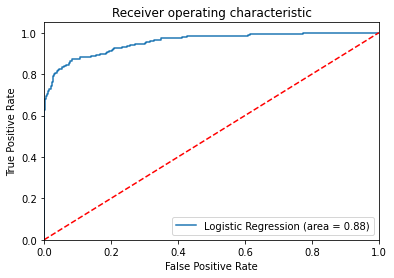

In [ ]:
#ROC Curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()